#  **Unsupervised Clustering of Online Shopping Behavior** ##

# Name: ABDUL KARRAR

## **Context**
**E-commerce platforms need to understand user behavior patterns to optimize conversion rates. This analysis uses unsupervised learning to segment anonymous user sessions based on browsing characteristics, enabling targeted marketing strategies without relying on purchase labels.**

## Problem Statement
 Identify distinct groups of user sessions using features like page durations and bounce rates. Derive actionable insights to:
- Reduce cart abandonment  
- Improve engagement  
- Personalize user experiences  

## Dataset Overview
## *Source*: [UCI Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset)  

## **Key Features**:
- **Numerical**: Administrative_Duration, Informational_Duration, ProductRelated_Duration, BounceRates, ExitRates  
- **Categorical**: Month, VisitorType, Weekend  
- **Removed Column**: Revenue (target variable excluded for unsupervised analysis)

## Workflow
1. **Data Preprocessing**: Encode categorical variables and scale features  
2. **Clustering**: K-Means with elbow method for optimal clusters  
3. **Validation**: Silhouette scores and PCA visualization  
4. **Insights**: Cluster characteristics and business recommendations  


## Load Data

## Importing Libraries

In [2]:
!pip install imbalanced-learn

In [51]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib

## Load dataset (Revenue already removed)

In [9]:
df = pd.read_csv('online_shoppers_intention Revenue removed.csv')
print("\t")
print("ONLINE SHOPPERS INTENSION ")
print("\t")
df

	
ONLINE SHOPPERS INTENSION 
	


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False


## Understand the Data Structure

In [10]:
# Check the number of rows and columns
print("\t")
print(f"The shape of the dataset is {df.shape}")

	
The shape of the dataset is (12330, 17)


In [11]:
# Display column names
print("\t")
print("Column names are:")
print("\t")
df.columns

	
Column names are:
	


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

In [12]:
# Check data types
print("\t")
print("Each column's data types are:")
print("\t")
df.dtypes

	
Each column's data types are:
	


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
dtype: object

In [13]:
# Get concise information about the dataset
print("\t")
print("Dataset Information:")
print("\t")
df.info()

	
Dataset Information:
	
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 1

In [14]:
# Summary statistics
print("\t")
print("Summary Statistics:")
print("\t")
df.describe()

	
Summary Statistics:
	


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [15]:
# Checking unique values in categorical columns
print("\t")
print("Unique Values in Categorical columns:")
print("\t")
df.nunique()

	
Unique Values in Categorical columns:
	


Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
dtype: int64

## Handling Missing Values

In [18]:
# Check for missing values
print("\t")
print("Total number of missing values:")
print("\t")
df.isnull().sum()

	
Total number of missing values:
	


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

## Check for Duplicate Values

In [19]:
# Check for duplicate rows
print("\t")
print(f"Total number of duplicate values is {df.duplicated().sum()}")

	
Total number of duplicate values is 125


In [20]:
# Remove duplicates if necessary
df = df.drop_duplicates()

In [21]:
print("\t")
print(f"The shape of the dataset after removing the duplicates is {df.shape}")

	
The shape of the dataset after removing the duplicates is (12205, 17)


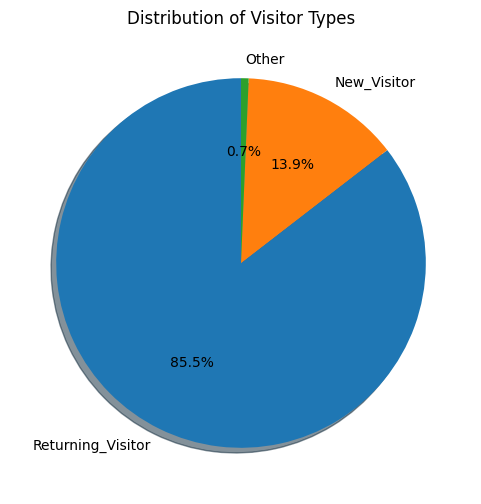

In [22]:
# --- Exploratory Data Analysis ---
# Univariate Analysis
# Categorical distribution: VisitorType
plt.figure(figsize=(6, 6))
df['VisitorType'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Distribution of Visitor Types')
plt.ylabel('')
plt.show()

## Categorical distribution: Month

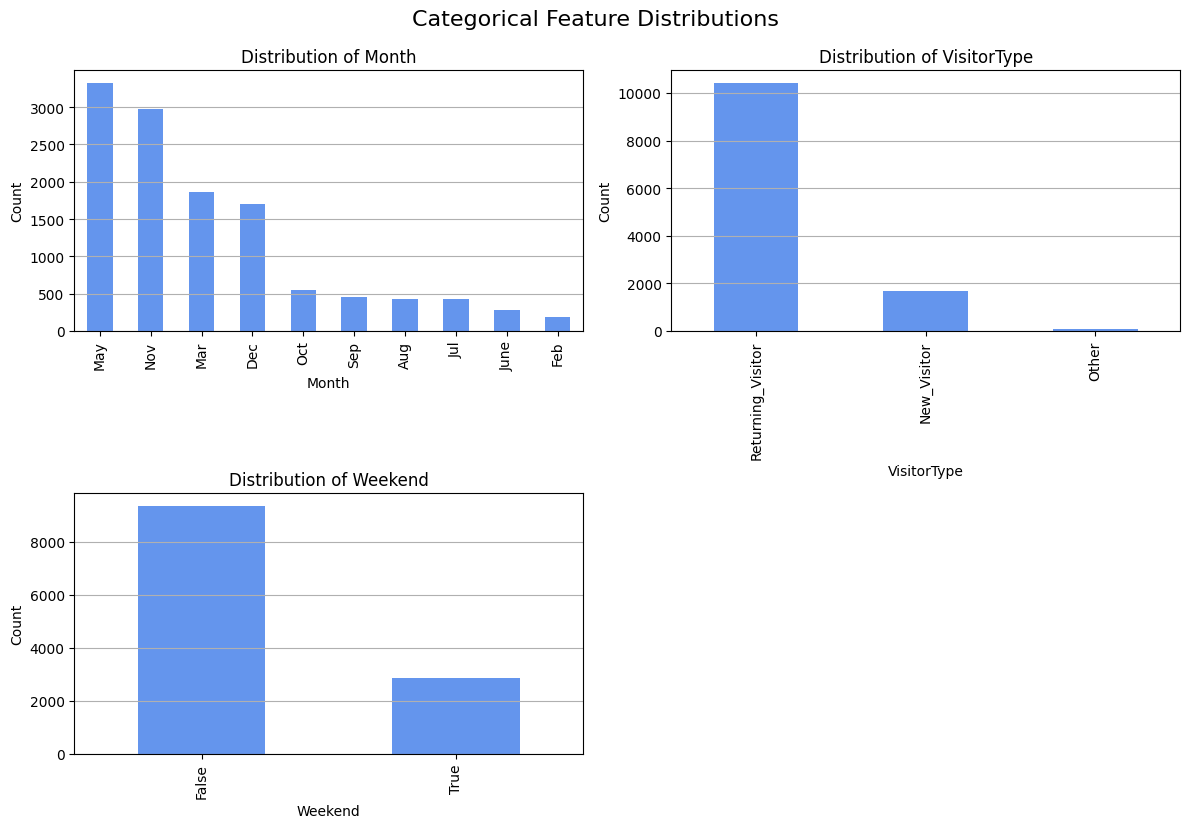

In [23]:
# Grid of column charts for categorical features
categorical_features = ['Month', 'VisitorType', 'Weekend']
cols = 2
rows = math.ceil(len(categorical_features) / cols)
plt.figure(figsize=(cols * 6, rows * 4))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(rows, cols, i)
    df[feature].value_counts().plot(kind='bar', color='cornflowerblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(axis='y')

plt.tight_layout()
plt.suptitle('Categorical Feature Distributions', fontsize=16, y=1.03)
plt.show()


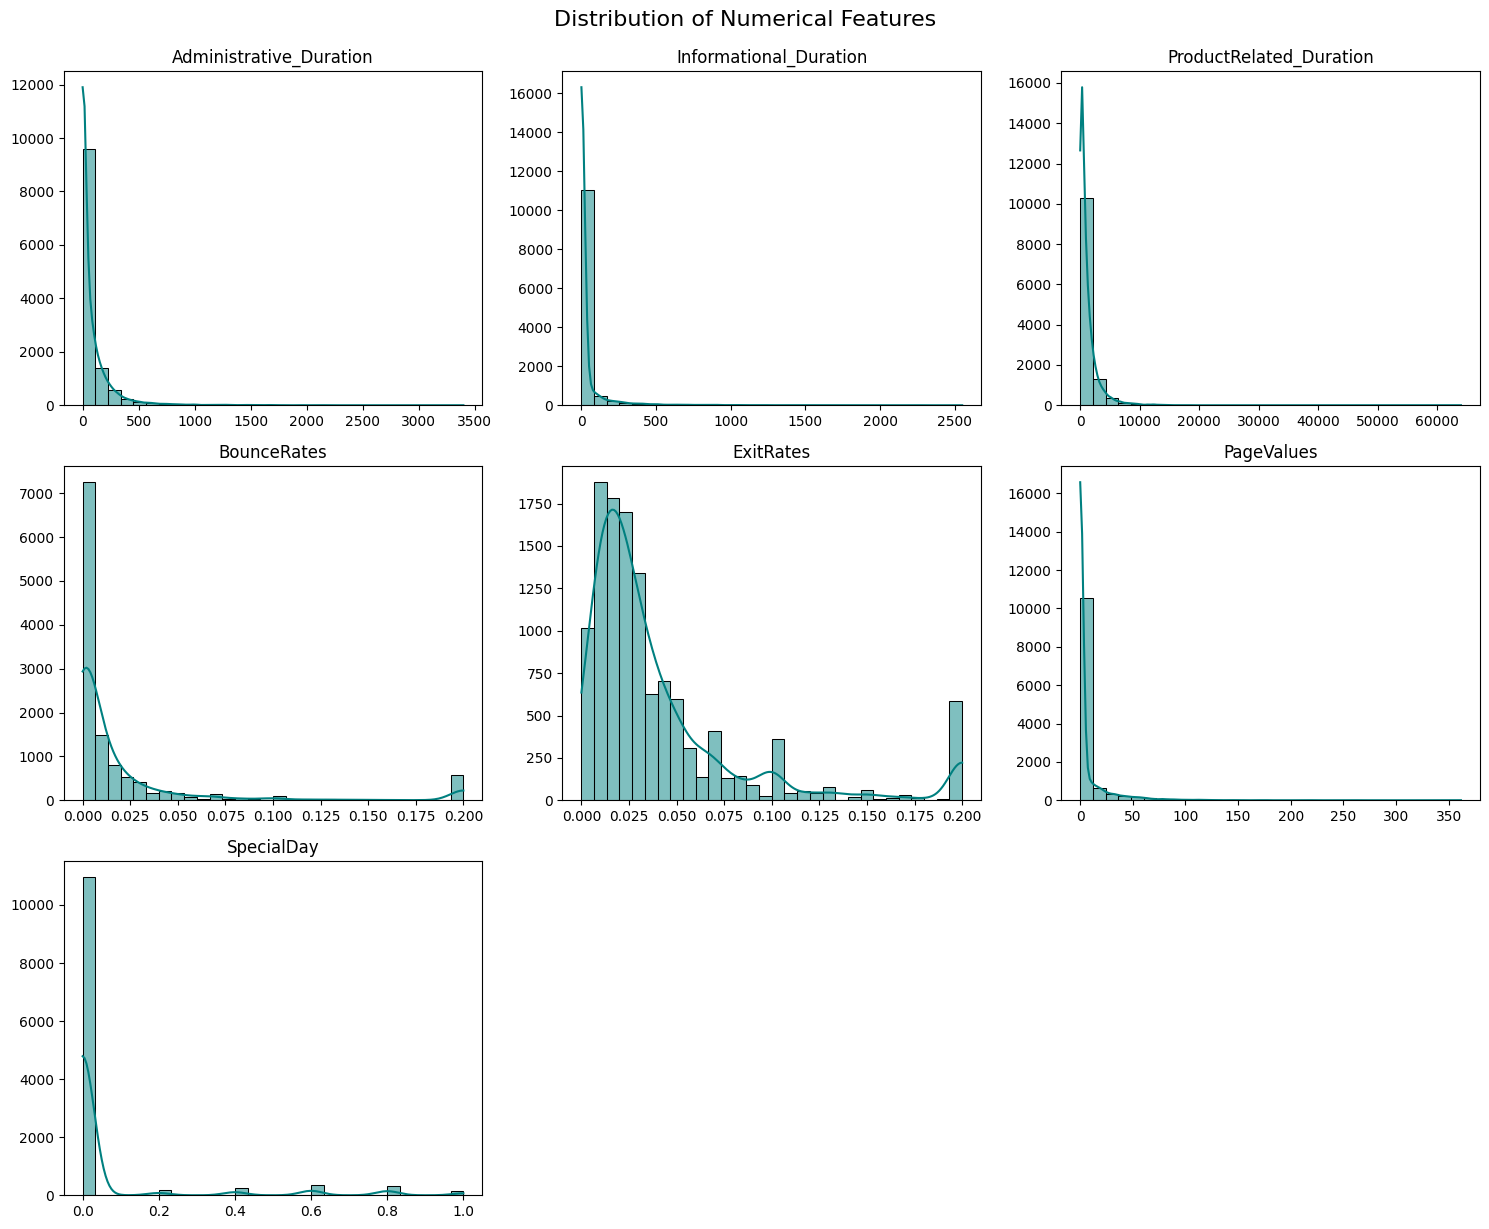

In [24]:
# All numerical histograms in a grid layout

num_features = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration',
                'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

rows = math.ceil(len(num_features) / 3)
plt.figure(figsize=(15, rows * 4))

for i, feature in enumerate(num_features, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[feature], kde=True, bins=30, color='teal')
    plt.title(f'{feature}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)
plt.show()


## Boxplots for all numerical features in a single grid to detect outliers

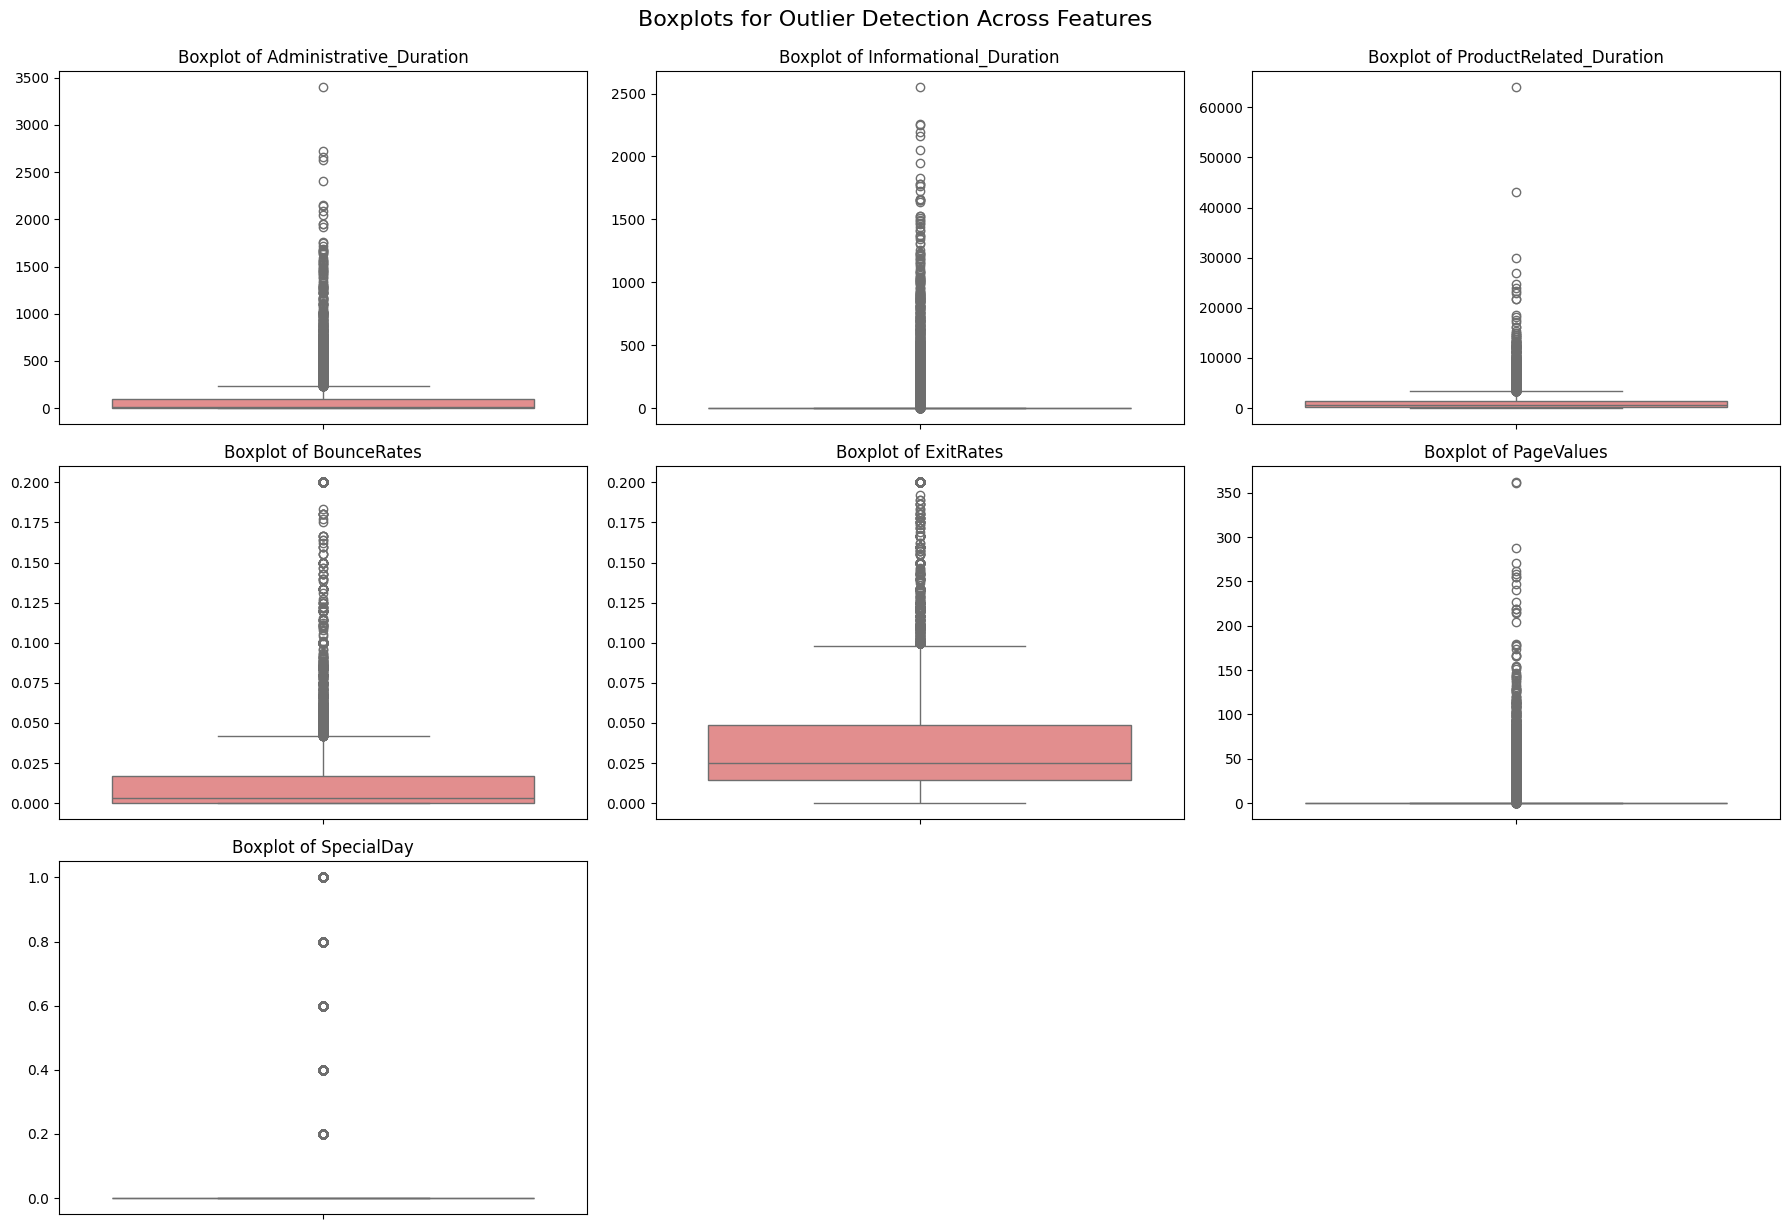

In [26]:
num_features = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration',
                'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

rows = math.ceil(len(num_features) / 3)
plt.figure(figsize=(18, rows * 4))

for i, feature in enumerate(num_features, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(y=df[feature], color='lightcoral')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle('Boxplots for Outlier Detection Across Features', fontsize=16, y=1.02)
plt.show()

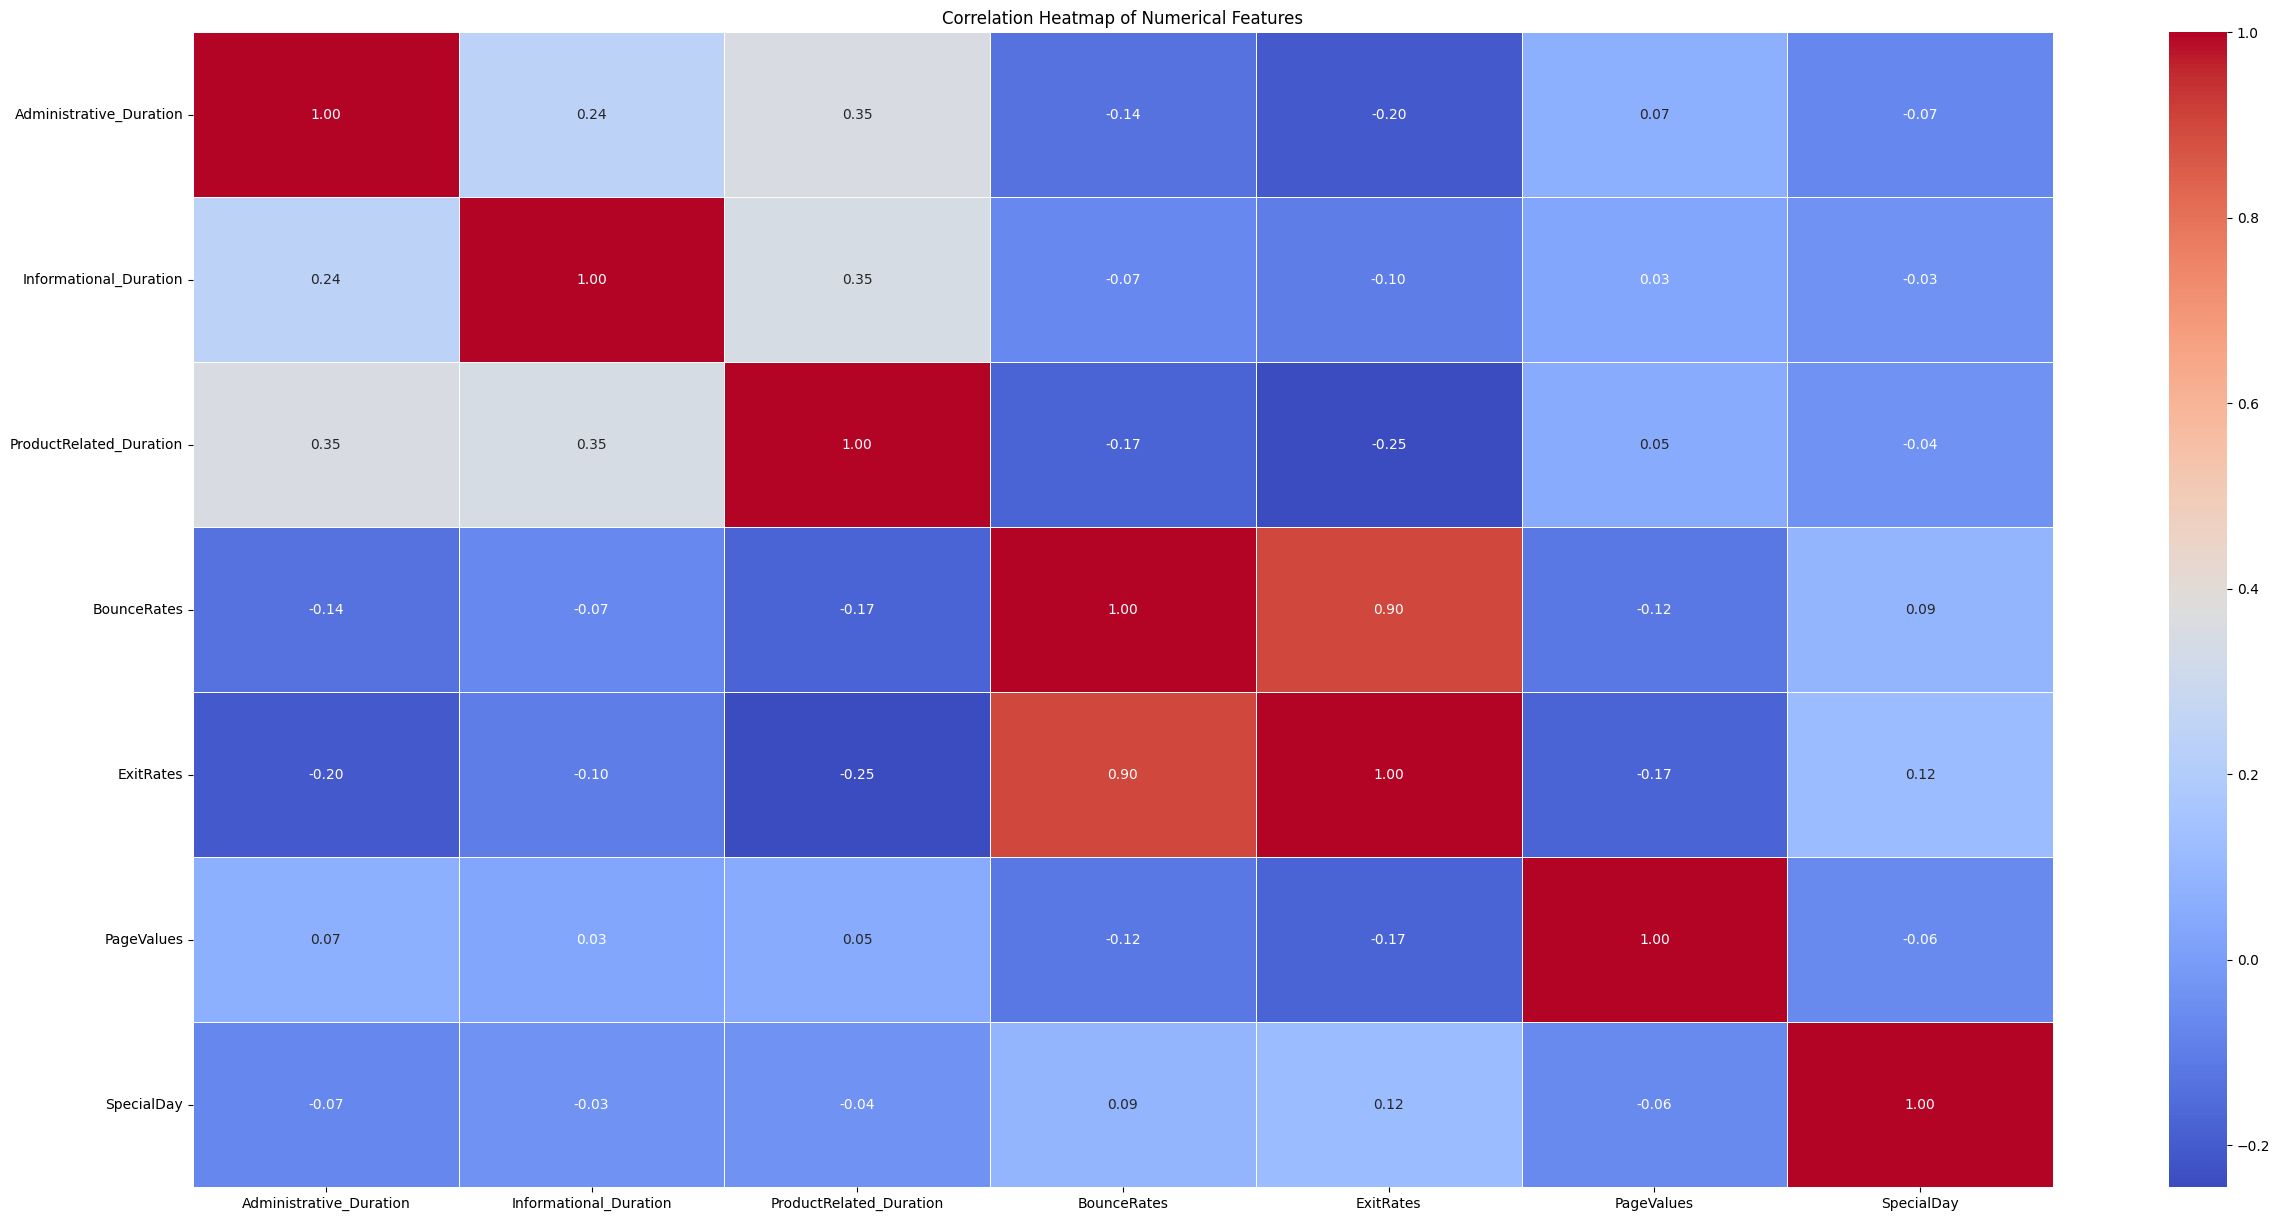

In [27]:
# Correlation Heatmap
plt.figure(figsize=(30, 15))
corr = df[num_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


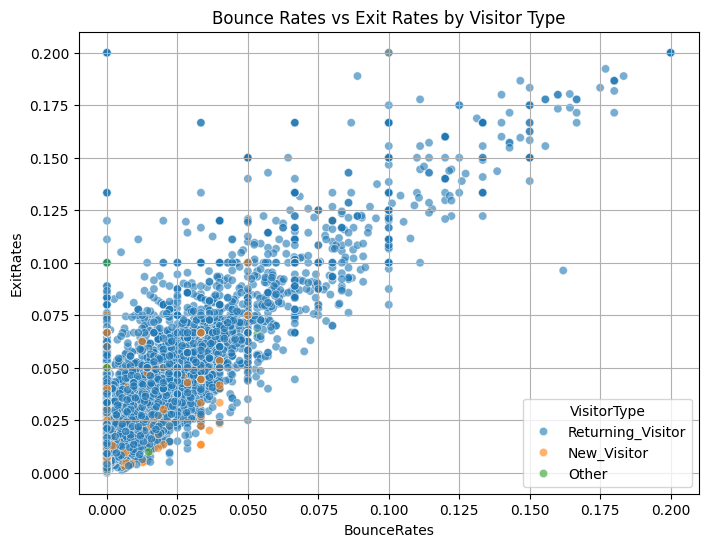

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='BounceRates', y='ExitRates', hue='VisitorType', alpha=0.6)
plt.title('Bounce Rates vs Exit Rates by Visitor Type')
plt.grid(True)
plt.show()


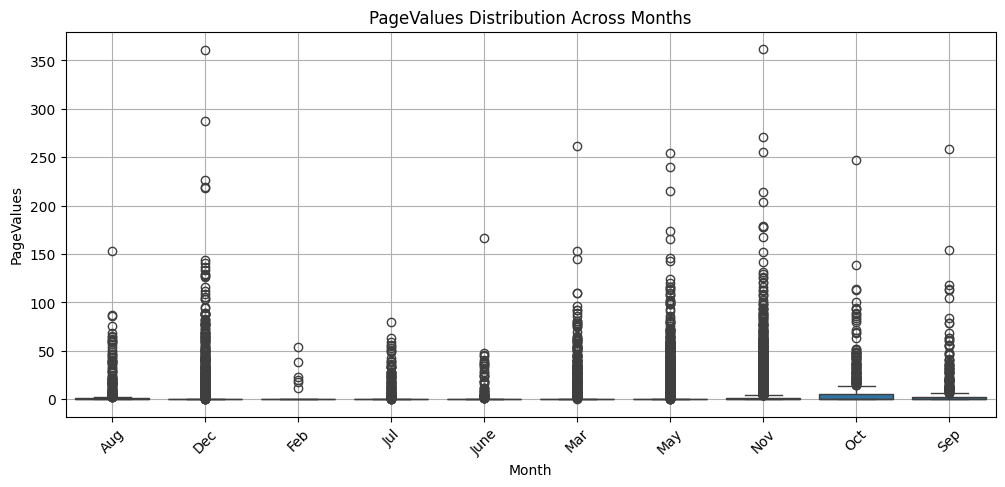

In [29]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Month', y='PageValues', order=sorted(df['Month'].unique()))
plt.title('PageValues Distribution Across Months')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


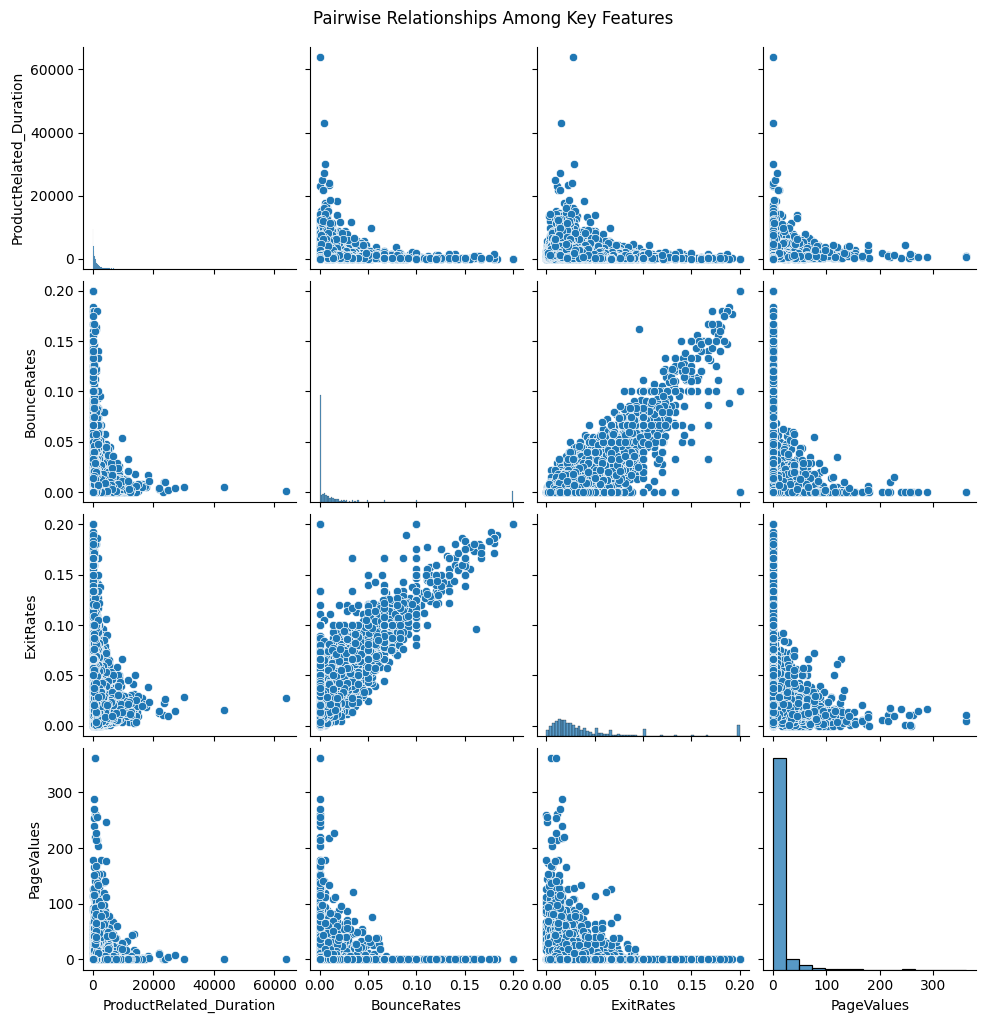

In [30]:
selected_features = ['ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
sns.pairplot(df[selected_features])
plt.suptitle('Pairwise Relationships Among Key Features', y=1.02)
plt.show()


#  Preprocessing
## One-hot encode categorical variables

In [31]:
df_encoded = pd.get_dummies(df, columns=['Month', 'VisitorType', 'Weekend'], drop_first=True)

In [32]:
# Scale numerical features
scaler = StandardScaler()
features_to_scale = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration',
                     'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

In [33]:
# Drop columns with interval data type (not compatible with KMeans)
df_encoded = df_encoded.loc[:, ~df_encoded.applymap(lambda x: isinstance(x, pd.Interval)).any()]

##  Elbow Method to Determine Optimal Clusters

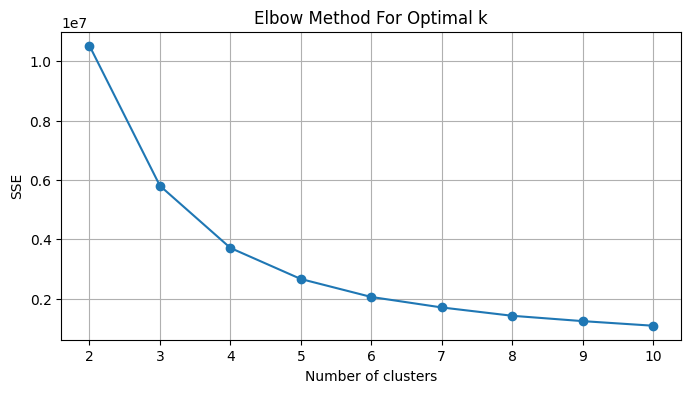

In [35]:
sse = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

In [36]:
#  K-Means Clustering
optimal_k = 3  # assume elbow shows 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_encoded)

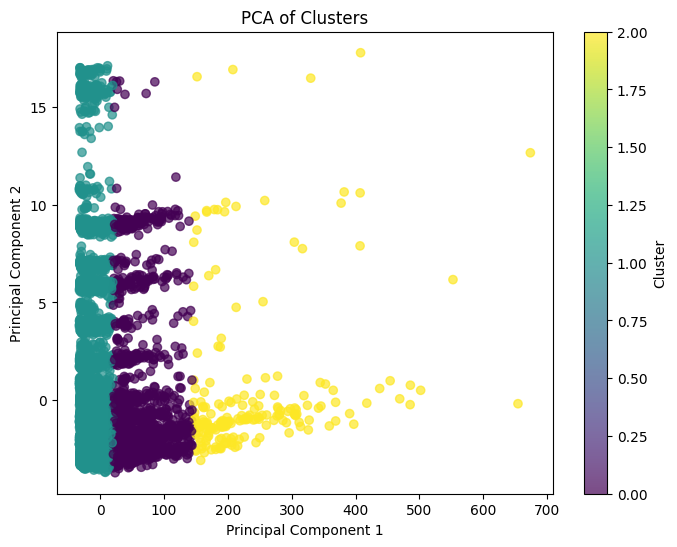

In [37]:
#  PCA for Visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_encoded.drop(columns='Cluster'))
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_encoded['Cluster'], cmap='viridis', alpha=0.7)
plt.title('PCA of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [38]:
!pip install umap-learn

In [41]:
from sklearn.cluster import KMeans, DBSCAN

##  UMAP + DBSCAN for Alternative Clustering View

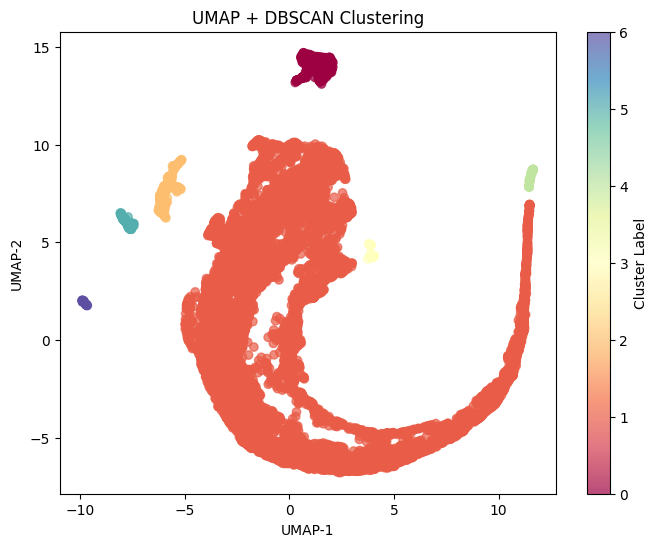

In [42]:
import umap.umap_ as umap

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_encoded.drop(columns='Cluster'))

dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(embedding)

plt.figure(figsize=(8, 6))
plt.scatter(embedding[:, 0], embedding[:, 1], c=db_labels, cmap='Spectral', alpha=0.7)
plt.title('UMAP + DBSCAN Clustering')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.colorbar(label='Cluster Label')
plt.show()


In [43]:
# Cluster Interpretation
# Append cluster back to original dataframe for interpretation
df['Cluster'] = df_encoded['Cluster']

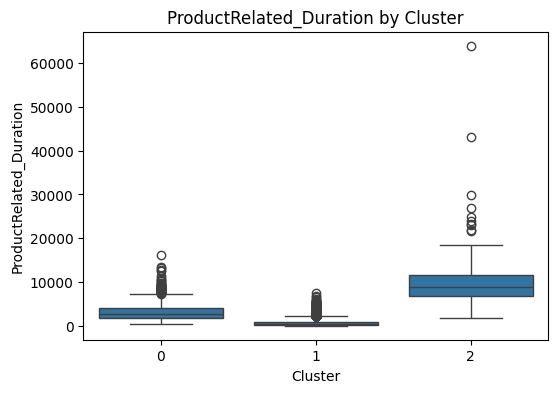

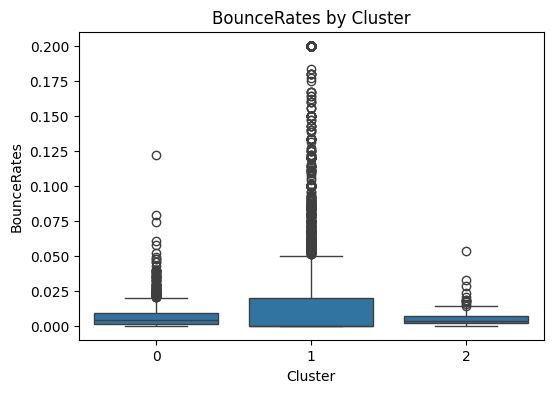

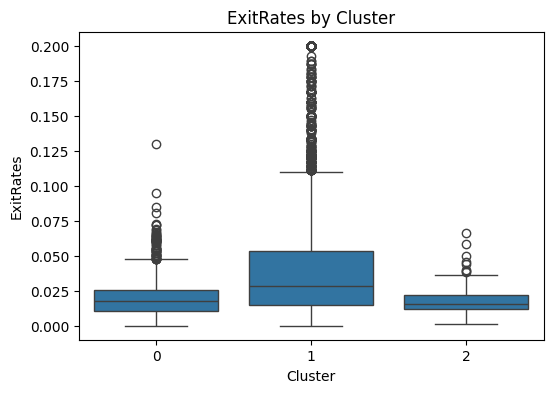

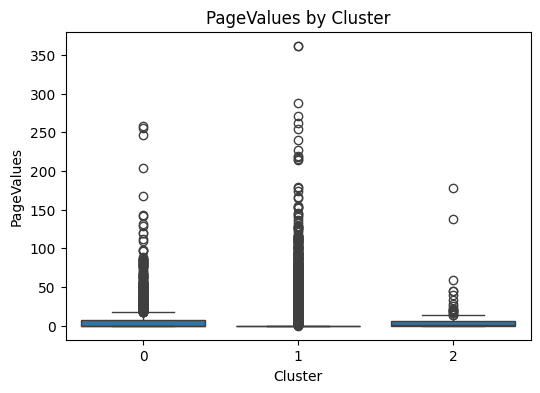

In [44]:
# Boxplots to compare features across clusters
features = ['ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'{feature} by Cluster')
    plt.show()

In [45]:
# Cluster Summary Table
cluster_summary = df.groupby('Cluster')[features].mean()
display(cluster_summary)


,ProductRelated_Duration,BounceRates,ExitRates,PageValues
Cluster,,,,
0,3176.670361,0.006554,0.019623,7.941828
1,676.437106,0.023190,0.045926,5.586006
2,9922.032884,0.005236,0.017393,5.936001


In [47]:
from sklearn.metrics import silhouette_score

In [48]:
# Silhouette Score for Validation
sil_score = silhouette_score(df_encoded.drop(columns='Cluster'), df_encoded['Cluster'])
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.67


## Actionable Business Insights
 - Cluster 0: High ProductRelated_Duration, low BounceRates → engaged users → target with loyalty programs.
 - Cluster 1: High ExitRates → consider exit-intent pop-ups or live chat support.
 - Cluster 2: High PageValues → send personalized offers to encourage conversions.

## Conclusion
- Using K-Means clustering and PCA, we revealed three distinct user behavior segments.
- UMAP + DBSCAN showed alternative clustering possibilities with non-linear structure.
- These insights can help e-commerce businesses tailor their strategies.
- Limitations: Interpretations are subjective; more advanced models may capture deeper patterns.